In [0]:
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_punctuation,strip_multiple_whitespaces,remove_stopwords
import pandas as pd
from gensim.corpora import Dictionary
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


In [0]:
# read data into pandas data frame
# train_df = pd.read_csv("nlp-getting-started/train.csv")
# df = pd.read_csv("nlp-getting-started/train.csv")

url = "https://github.com/philipayazi/Disaster_Tweets/raw/master/nlp-getting-started/train.csv"
train_df = pd.read_csv(url)

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
# clean tweets of white spaces, punctuations, stopwords, and make all letters lowercase
custom_filters = [lambda x: x.lower(),
                  strip_multiple_whitespaces,
                  strip_punctuation,
                  remove_stopwords]

def clean_string(row):
    return preprocess_string(row['text'], custom_filters)

In [5]:
# append cleaned tweets to dataframe
train_df['cleaned_tweets'] = train_df.apply(clean_string, axis=1)

train_df.head()

,id,keyword,location,text,target,cleaned_tweets
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, allah, forgive]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13, 000, people, receive, wildfires, evacuati..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [0]:
cleaned_tweets_lst = train_df['cleaned_tweets'].to_list()

In [0]:
# cleaned_tweets_lst

In [0]:
cleaned_tweets_lst = [' '.join(cleaned_tweet) for cleaned_tweet in cleaned_tweets_lst]

In [0]:
# convert cleaned_tweets column to dictionary
dct = Dictionary(train_df.cleaned_tweets)

In [0]:
# convert dictionary to matrix
gen_corpus = [dct.doc2bow(line) for line in train_df.cleaned_tweets]

In [11]:
gen_corpus[:5]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)],
 [(11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 2)],
 [(12, 1), (16, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)],
 [(25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1)]]

In [0]:
# create model
from gensim.models import TfidfModel
# td_model = TfidfModel(gen_corpus)

In [0]:
# model

In [0]:
# fit model
# vector = model[corpus]

In [0]:
# print(vector)

In [0]:
# vector_0 = model[corpus[0]]

In [0]:
# vector_1 = model[corpus[1]]

In [0]:
# The above code does not seem to be correct because it is treating redundent words as unique. Create dictionary of
# frequency counts of unique words
from collections import defaultdict
frequency = defaultdict(int)
for text in train_df.cleaned_tweets:
    for token in text:
        frequency[token] += 1

In [0]:
# convert default dictionary to dictionary
frequency = dict(frequency)

#EDA of Data Set

In [0]:
target_count = train_df.groupby('target').count().drop(columns = ['id', 'keyword', 'location', 'text'], axis=1)

In [127]:
target_count

,cleaned_tweets,corpus
target,,
0,4342,4342
1,3271,3271


In [0]:
target_pct = round(target_count.div(target_count['cleaned_tweets'].sum()) * 100, 2)

In [0]:
target_pct = target_pct.rename(columns={'cleaned_tweets': "percent"})

In [0]:
target_pct = target_pct.reset_index()

In [0]:
target_pct = target_pct.replace({"target":{0: "False", 1: "True"}})

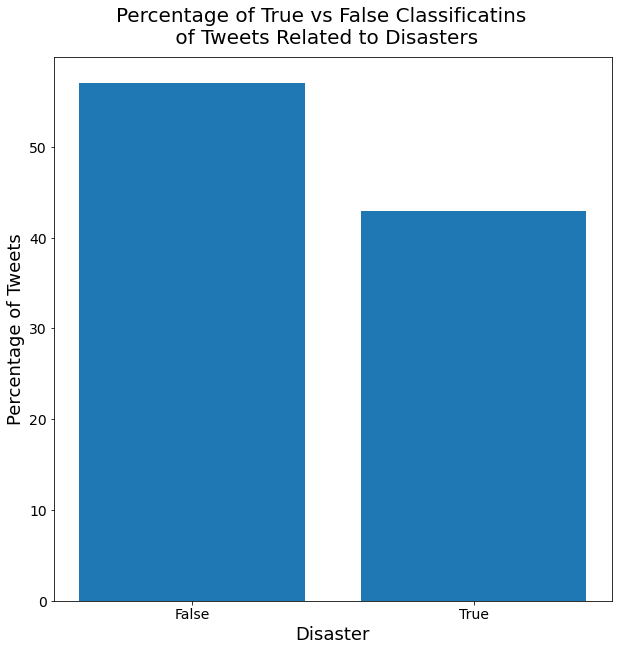

In [164]:
from matplotlib import pyplot as plt    

fig = plt.figure(figsize=(10,10))
plt.bar(target_pct['target'], target_pct['percent'])
fig.suptitle('Percentage of True vs False Classificatins \n of Tweets Related to Disasters', fontsize=20, y=.95)
plt.xlabel('Disaster', fontsize=18)
plt.ylabel('Percentage of Tweets', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig('classification_balance.png')

# All of these analyses are on dense vectors. We need to analyze sparse vectors

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [0]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(cleaned_tweets_lst, train_df['target'], test_size = 0.3, random_state = 42)

In [0]:
train_corpus = X_train_split

train_vectorizer = CountVectorizer()

X_train = train_vectorizer.fit_transform(train_corpus)

In [0]:
test_corpus = X_test_split

X_test = train_vectorizer.transform(test_corpus)

In [30]:
X_train_shaped = X_train.shape

X_train_shaped

(5329, 16712)

In [31]:
X_test_shaped = X_test.shape

X_test_shaped

(2284, 16712)

In [32]:
train_vectorizer.vocabulary_

{'ashes': 1698,
 '2015': 276,
 'australia': 1820,
 'ûªs': 16683,
 'collapse': 3475,
 'trent': 14935,
 'bridge': 2602,
 'worst': 16119,
 'history': 7014,
 'england': 5146,
 'bundled': 2725,
 '60': 668,
 'http': 7187,
 't5trhjuau0': 14251,
 'great': 6517,
 'michigan': 9568,
 'technique': 14398,
 'camp': 2890,
 'b1g': 1899,
 'thanks': 14506,
 'bmurph1019': 2428,
 'hail': 6709,
 'youtsey': 16476,
 'termn8r13': 14450,
 'goblue': 6407,
 'wrestleon': 16153,
 'oaskgki6qj': 10509,
 'cnn': 3423,
 'tennessee': 14436,
 'movie': 9879,
 'theater': 14518,
 'shooting': 13255,
 'suspect': 14161,
 'killed': 8358,
 'police': 11390,
 'di8elzswnr': 4387,
 'rioting': 12480,
 'couple': 3743,
 'hours': 7151,
 'left': 8715,
 'class': 3350,
 'crack': 3778,
 'path': 11032,
 'wiped': 16002,
 'morning': 9831,
 'beach': 2108,
 'run': 12709,
 'surface': 14137,
 'wounds': 16127,
 'elbow': 5010,
 'right': 12464,
 'knee': 8419,
 'yaqrsximph': 16377,
 'experts': 5382,
 'france': 5954,
 'begin': 2153,
 'examining': 5329,

In [0]:
feature_names = train_vectorizer.get_feature_names()

In [0]:
sparse_vectors = X_train.toarray()

In [35]:
sparse_vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model = LogisticRegression().fit(X_train, y_train_split)

In [38]:
model.score(X_train, y_train_split)

0.9711015199849878

In [39]:
model.predict(X_test)

array([0, 0, 1, ..., 1, 1, 0])

In [40]:
model.score(X_test, y_test_split)

0.7981611208406305

# Word2Vec model using Spacy

In [0]:
import spacy
import gensim.downloader as api
from gensim.test.utils import get_tmpfile
from gensim.models import Word2Vec

In [0]:
# !python -m spacy download en_core_web_lg

In [0]:
nlp = spacy.load("en_core_web_lg")

In [44]:
train_corpus[:3]

['ashes 2015 australia\x89ûªs collapse trent bridge worst history england bundled australia 60 http t t5trhjuau0',
 'great michigan technique camp b1g thanks bmurph1019 hail youtsey termn8r13 goblue wrestleon http t oaskgki6qj',
 'cnn tennessee movie theater shooting suspect killed police http t di8elzswnr']

In [0]:
train_df['corpus'] = cleaned_tweets_lst

In [46]:
train_df.head()

,id,keyword,location,text,target,cleaned_tweets,corpus
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, allah, forgive]",deeds reason earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, near, la, ronge, sask, canada]",forest near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o...",residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13, 000, people, receive, wildfires, evacuati...",13 000 people receive wildfires evacuation ord...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfires pou...


In [0]:
# train each tweet in dataframe with model
# tweet_tokens = []
# for tweet in train_df['corpus']:
#   tweet_tokens.append(nlp(tweet))

train_tweet_tokens = []
for tweet in train_corpus:
  train_tweet_tokens.append(nlp(tweet))

In [0]:
# oov_words = []

# for token in train_tweet_tokens:
#   if token.is_oov == True:
#     oov_words.append(token.text)

In [0]:
# tweet_vectors = []
# for token in tweet_tokens:
#   tweet_vectors.append(token.vector)

train_tweet_vectors = []
for token in train_tweet_tokens:
  train_tweet_vectors.append(token.vector)

#Embedding: Word2Vec, Classifier: Logistic Regression

In [0]:
w2v_lr = LogisticRegression(n_jobs=-1).fit(train_tweet_vectors, y_train_split)

In [51]:
w2v_lr.score(train_tweet_vectors, y_train_split)

0.8166635391255395

In [0]:

# Now run model on test

In [53]:
len(test_corpus)

2284

In [0]:
test_tweet_tokens = []
for tweet in test_corpus:
  test_tweet_tokens.append(nlp(tweet))

In [55]:
test_tweet_tokens[:5]

[new weapon cause imaginable destruction,
 f amp ing things gishwhes got soaked deluge going pads tampons thx mishacollins,
 dt georgegalloway rt galloway4mayor ûïthe col police catch pickpocket liverpool stree http t vxin1goq4q,
 aftershock school kick great want thank making possible great night,
 response trauma children addicts develop defensive self decreases vulnerability 3]

In [0]:
test_tweet_vectors = []
for token in test_tweet_tokens:
  test_tweet_vectors.append(token.vector)

In [0]:
w2v_lr_test_score = w2v_lr.score(test_tweet_vectors, y_test_split)

In [58]:
print('test score = ', w2v_lr_test_score)
print(classification_report(y_test_split, w2v_lr.predict(test_tweet_vectors)))

test score =  0.7933450087565674
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1318
           1       0.77      0.73      0.75       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.79      0.79      2284



In [0]:
# With hyper tuned parameters

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
dist = dict(C=uniform(loc=0, scale=4),solver =['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], multi_class=['ovr'], l1_ratio=np.linspace(0, 1, num=50))
rdm_mdl_w2v_lr = RandomizedSearchCV(w2v_lr, dist, iid= True, random_state = 61, verbose = 3, n_jobs=-1)

rdm_mdl_w2v_lr_search = rdm_mdl_w2v_lr.fit(train_tweet_vectors, y_train_split)
print(rdm_mdl_w2v_lr_search.best_params_)

rdm_mdl_w2v_lr_test_score = rdm_mdl_w2v_lr_search.score(test_tweet_vectors, y_test_split)
print(rdm_mdl_w2v_lr_test_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


{'C': 1.1274755903429812, 'l1_ratio': 0.9183673469387754, 'multi_class': 'ovr', 'solver': 'newton-cg'}
0.7933450087565674


In [61]:
print(classification_report(y_test_split, rdm_mdl_w2v_lr_search.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1318
           1       0.77      0.73      0.75       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.79      0.79      2284



In [0]:
conf_scores = rdm_mdl_w2v_lr_search.decision_function(test_tweet_vectors)

roc_curve_lr = roc_curve(y_test_split, conf_scores)

In [197]:
conf_scores

array([-2.23598446, -3.57053154,  0.24811198, ...,  5.29868571,
        5.33136863,  0.80730609])

In [198]:
roc_curve

<function sklearn.metrics._ranking.roc_curve>

#Embedding: Word2Vec, Classifier: Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
w2v_rf = RandomForestClassifier(n_jobs=-1).fit(train_tweet_vectors, y_train_split)

In [65]:
w2v_rf_train_score = w2v_rf.score(train_tweet_vectors, y_train_split)
w2v_rf_train_score

0.9885531994745731

In [66]:
w2v_rf_test_score  = w2v_rf.score(test_tweet_vectors, y_test_split)
w2v_rf_test_score

0.8029772329246935

In [67]:
print('test score = ', w2v_rf_test_score)
print(classification_report(y_test_split, w2v_rf.predict(test_tweet_vectors)))

test score =  0.8029772329246935
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1318
           1       0.83      0.67      0.74       966

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.79      2284
weighted avg       0.81      0.80      0.80      2284



In [0]:
# Tune with hyperparameters

In [0]:
w2v_rf_dist = dict(n_estimators = randint(1,200), max_features =['sqrt', 'log2'])

rdm_mdl_w2v_rf = RandomizedSearchCV(w2v_rf, w2v_rf_dist, random_state= 1708, verbose=3, n_jobs =-1)

In [70]:
rdm_mdl_w2v_rf_srch = rdm_mdl_w2v_rf.fit(train_tweet_vectors, y_train_split)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


In [71]:
print(rdm_mdl_w2v_rf_srch.best_params_)

{'max_features': 'log2', 'n_estimators': 199}


In [72]:
# score with the tuned model
rdm_mdl_w2v_rf_test_score =rdm_mdl_w2v_rf_srch.score(test_tweet_vectors, y_test_split)
print(rdm_mdl_w2v_rf_test_score)

0.8152364273204904


In [73]:
print(classification_report(y_test_split, rdm_mdl_w2v_rf_srch.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1318
           1       0.86      0.68      0.76       966

    accuracy                           0.82      2284
   macro avg       0.83      0.80      0.80      2284
weighted avg       0.82      0.82      0.81      2284



In [0]:
conf_scores_w2v_rf = rdm_mdl_w2v_rf_srch.predict_proba(test_tweet_vectors)

In [222]:
conf_scores_w2v_rf

array([[0.63149079, 0.36850921],
       [0.83961474, 0.16038526],
       [0.4798995 , 0.5201005 ],
       ...,
       [0.20926059, 0.79073941],
       [0.14396985, 0.85603015],
       [0.52051926, 0.47948074]])

In [0]:
roc_curve_w2v_rf = roc_curve(y_test_split, conf_scores_w2v_rf)

In [214]:
y_test_split.shape

(2284,)

#Embedding: Word2Vec, Classifier: XGBoost

In [0]:
import xgboost as xgb

In [0]:
w2v_xgb = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)

In [0]:
train_tweet_vectors = np.asarray(train_tweet_vectors)
w2v_xgb = w2v_xgb.fit(train_tweet_vectors, y_train_split)

In [77]:
train_tweet_vectors.shape

(5329, 300)

In [78]:
w2v_xgb_train_score = w2v_xgb.score(train_tweet_vectors, y_train_split)
w2v_xgb_train_score

0.8722086695440046

In [79]:
w2v_xgb_test_score = w2v_xgb.score(test_tweet_vectors, y_test_split)
w2v_xgb_test_score

0.8169877408056042

In [80]:
print('train score = ', w2v_xgb_train_score)
print('test score = ', w2v_xgb_test_score)
print(classification_report(y_test_split, w2v_xgb.predict(test_tweet_vectors)))

train score =  0.8722086695440046
test score =  0.8169877408056042
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1318
           1       0.81      0.74      0.77       966

    accuracy                           0.82      2284
   macro avg       0.82      0.81      0.81      2284
weighted avg       0.82      0.82      0.82      2284



In [81]:
rdm_mdl_w2v_xgb_dist = dict(n_estimators = randint(1,300), learning_rate = uniform(loc=0.05, scale=.5))
rdm_mdl_w2v_xgb = RandomizedSearchCV(w2v_xgb, rdm_mdl_w2v_xgb_dist, random_state=1708, verbose=3, n_jobs =-1)

rdm_mdl_w2v_xgb_srch = rdm_mdl_w2v_xgb.fit(train_tweet_vectors, y_train_split)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.4min finished


In [82]:
print(rdm_mdl_w2v_xgb_srch.best_params_)

{'learning_rate': 0.12712354107224427, 'n_estimators': 292}


In [83]:
# score with the tuned model
rdm_mdl_w2v_xgb_test_score =rdm_mdl_w2v_xgb.score(test_tweet_vectors, y_test_split)
print(rdm_mdl_w2v_xgb_test_score)

0.8248686514886164


In [84]:
print(classification_report(y_test_split, rdm_mdl_w2v_xgb_srch.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1318
           1       0.82      0.75      0.78       966

    accuracy                           0.82      2284
   macro avg       0.82      0.81      0.82      2284
weighted avg       0.82      0.82      0.82      2284



In [0]:
# conf_scores_w2v_rf = rdm_mdl_w2v_lr_search.decision_function(test_tweet_vectors)

# roc_curve_w2v_rf = roc_curve(y_test_split, conf_scores_w2v_rf)

#W2V ROC Curve

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

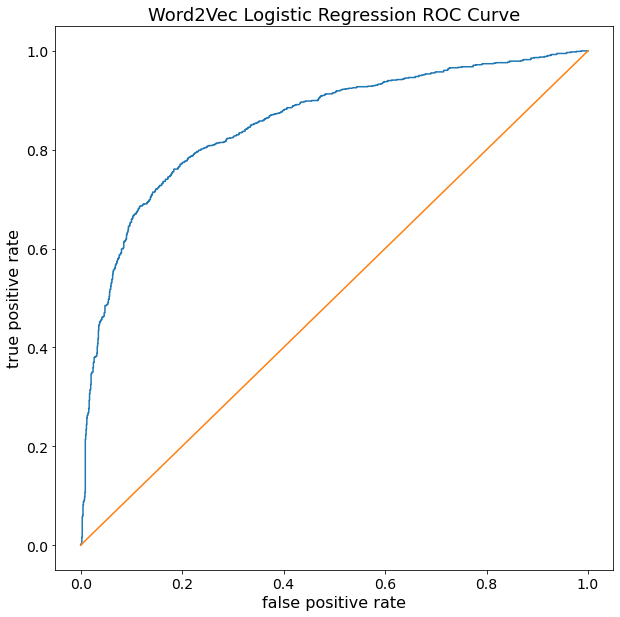

In [201]:
fig_1 = plt.figure(figsize=(10,10))
plt.plot(roc_curve_lr[0], roc_curve_lr[1])
plt.plot([0,1], [0,1])
# plt.plot(roc_curve_rf[0], roc_curve_lr[1])
# plt.plot(roc_curve_xgb[0], roc_curve_xgb[1])
plt.title("Word2Vec Logistic Regression ROC Curve", fontsize=18)
plt.xlabel('false positive rate', fontsize=16)
plt.ylabel('true positive rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# GloVe model Using Spacy

In [0]:
# !python -m spacy download en_vectors_web_lg

In [0]:
GloVe_nlp = spacy.load('en_vectors_web_lg')

In [0]:
glove_trained_tweet_tokens = []
for tweet in train_corpus:
  glove_trained_tweet_tokens.append(GloVe_nlp(tweet))

In [0]:
glove_test_tweet_tokens = []
for tweet in test_corpus:
  glove_test_tweet_tokens.append(GloVe_nlp(tweet))

In [0]:
glove_test_tweet_tokens

In [0]:
glove_trained_tweet_vectors = []
for token in glove_trained_tweet_tokens:
  glove_trained_tweet_vectors.append(token.vector)

In [0]:
glove_test_tweet_vectors = []
for token in glove_test_tweet_tokens:
  glove_test_tweet_vectors.append(token.vector)

In [0]:
glove_trained_tweet_vectors[:2]

In [0]:
glove_test_tweet_vectors[:2]

#Embedding: GLoVE, Classifier: Logistic Regression

In [0]:
glove_lr = LogisticRegression(n_jobs=-1).fit(glove_trained_tweet_vectors, y_train_split)

In [0]:
glove_lr_train_score = glove_lr.score(glove_trained_tweet_vectors, y_train_split)
glove_lr_test_score = glove_lr.score(glove_test_tweet_vectors, y_test_split)

In [96]:
print('train score = ', glove_lr_train_score)
print('test score = ', glove_lr_test_score)
print(classification_report(y_test_split, glove_lr.predict(test_tweet_vectors)))

train score =  0.8151623193844999
test score =  0.7942206654991243
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1318
           1       0.77      0.73      0.75       966

    accuracy                           0.79      2284
   macro avg       0.79      0.79      0.79      2284
weighted avg       0.79      0.79      0.79      2284



In [0]:
# With hyper tuned parameters

In [98]:
dist = dict(C=uniform(loc=0, scale=4),solver =['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], max_iter= np.linspace(100, 1000, num=10))
rdm_mdl_glove_lr = RandomizedSearchCV(glove_lr, dist, random_state = 61, verbose = 3, n_jobs=-1)

rdm_mdl_glove_lr_search = rdm_mdl_glove_lr.fit(train_tweet_vectors, y_train_split)
print(rdm_mdl_glove_lr_search.best_params_)

rdm_mdl_glove_lr_test_score = rdm_mdl_glove_lr_search.score(test_tweet_vectors, y_test_split)
print(rdm_mdl_glove_lr_test_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.7s finished


{'C': 0.1594926960689973, 'max_iter': 600.0, 'solver': 'lbfgs'}
0.8007880910683012


In [112]:
print(classification_report(y_test_split, rdm_mdl_glove_lr_search.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1318
           1       0.78      0.73      0.76       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



In [0]:
glove_conf_scores = rdm_mdl_glove_lr_search.decision_function(test_tweet_vectors)

In [0]:
glove_roc_curve_lr = roc_curve(y_test_split, glove_conf_scores)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

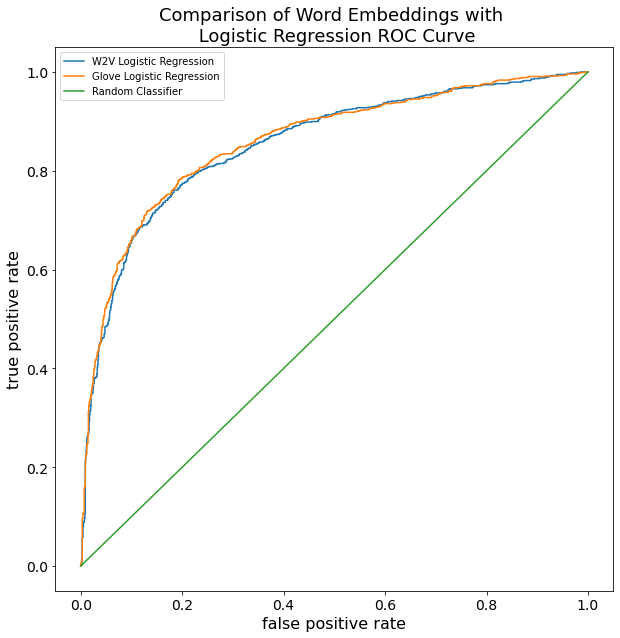

In [232]:
fig_1 = plt.figure(figsize=(10,10))
plt.plot(roc_curve_lr[0], roc_curve_lr[1], label= "W2V Logistic Regression")
plt.plot(glove_roc_curve_lr[0], glove_roc_curve_lr[1], label= "Glove Logistic Regression")
plt.plot([0,1], [0,1], label= "Random Classifier")
plt.legend()
# plt.plot(roc_curve_rf[0], roc_curve_lr[1])
# plt.plot(roc_curve_xgb[0], roc_curve_xgb[1])
plt.title("Comparison of Word Embeddings with \n Logistic Regression ROC Curve", fontsize=18)
plt.xlabel('false positive rate', fontsize=16)
plt.ylabel('true positive rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Embedding: GloVe, Classifier: Random Forest

In [0]:
glove_rf = RandomForestClassifier(n_jobs=-1).fit(glove_trained_tweet_vectors, y_train_split)

In [0]:
glove_rf_train_score = glove_rf.score(glove_trained_tweet_vectors, y_train_split)
glove_rf_test_score = glove_rf.score(glove_test_tweet_vectors, y_test_split)

In [101]:
print('train score = ', glove_rf_train_score)
print('test score = ', glove_rf_test_score)
print(classification_report(y_test_split, glove_rf.predict(test_tweet_vectors)))

train score =  0.9885531994745731
test score =  0.809106830122592
              precision    recall  f1-score   support

           0       0.79      0.90      0.85      1318
           1       0.84      0.68      0.75       966

    accuracy                           0.81      2284
   macro avg       0.82      0.79      0.80      2284
weighted avg       0.81      0.81      0.81      2284



In [102]:
glove_rf_dist = dict(n_estimators = randint(1,200), max_features =['sqrt', 'log2'], max_depth=[np.linspace(20, 200, num=10), np.logspace(2, 3, base=2)], min_samples_split=[np.linspace(20, 200, num=10), np.logspace(2, 3, base=2)])

rdm_mdl_glove_rf = RandomizedSearchCV(glove_rf, w2v_rf_dist, random_state= 1708, verbose=3, n_jobs =-1)

rdm_mdl_glove_rf_srch = rdm_mdl_glove_rf.fit(train_tweet_vectors, y_train_split)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


In [103]:
print(rdm_mdl_glove_rf_srch.best_params_)

{'max_features': 'log2', 'n_estimators': 199}


In [104]:
rdm_mdl_glove_rf_test_score =rdm_mdl_glove_rf_srch.score(test_tweet_vectors, y_test_split)
print(rdm_mdl_glove_rf_test_score)

0.8169877408056042


In [113]:
print(classification_report(y_test_split, rdm_mdl_glove_rf_srch.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1318
           1       0.86      0.67      0.76       966

    accuracy                           0.82      2284
   macro avg       0.83      0.80      0.81      2284
weighted avg       0.82      0.82      0.81      2284



#Embedding: GloVe, Classifier: XGBoost

In [0]:
glove_xgb = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)

In [0]:
glove_trained_tweet_vectors = np.asarray(glove_trained_tweet_vectors)
glove_xgb = glove_xgb.fit(glove_trained_tweet_vectors, y_train_split)

In [0]:
glove_xgb_train_score = glove_xgb.score(glove_trained_tweet_vectors, y_train_split)
glove_xgb_test_score = glove_xgb.score(glove_test_tweet_vectors, y_test_split)

In [108]:
print('train score = ', glove_xgb_train_score)
print('test score = ', glove_xgb_test_score)
print(classification_report(y_test_split, glove_xgb.predict(test_tweet_vectors)))

train score =  0.8693938825295553
test score =  0.8213660245183888
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1318
           1       0.82      0.74      0.78       966

    accuracy                           0.82      2284
   macro avg       0.82      0.81      0.81      2284
weighted avg       0.82      0.82      0.82      2284



In [109]:
rdm_mdl_glove_xgb_dist = dict(n_estimators = randint(1,300), learning_rate = uniform(loc=0.05, scale=.5))
rdm_mdl_glove_xgb = RandomizedSearchCV(glove_xgb, rdm_mdl_glove_xgb_dist, random_state=1708, verbose=3, n_jobs =-1)

rdm_mdl_glove_xgb_srch = rdm_mdl_glove_xgb.fit(train_tweet_vectors, y_train_split)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.3min finished


In [110]:
print(rdm_mdl_glove_xgb_srch.best_params_)

{'learning_rate': 0.12712354107224427, 'n_estimators': 292}


In [111]:
# score with the tuned model
rdm_mdl_glove_xgb_test_score =rdm_mdl_glove_xgb.score(test_tweet_vectors, y_test_split)
print(rdm_mdl_glove_xgb_test_score)

0.8248686514886164


In [114]:
print(classification_report(y_test_split, rdm_mdl_glove_xgb_srch.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1318
           1       0.82      0.75      0.78       966

    accuracy                           0.82      2284
   macro avg       0.82      0.81      0.82      2284
weighted avg       0.82      0.82      0.82      2284



#Handling Out Of Vocabulary Words